### Author: Kubam Ivo

### Date: 1/28/2021

### Project: US-Shootings

In [184]:
# Importing libraries
from pmdarima.model_selection import train_test_split
from pmdarima.utils import tsdisplay
from sklearn.metrics import mean_squared_error as mse
from pmdarima import pipeline
from pmdarima import arima
import pmdarima as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:
# importing dataset
df_shoot = pd.read_csv('./data/shootings.csv')

In [186]:
df_shoot.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [187]:
# Extracting Year and week from date
df_shoot['year'] = pd.DatetimeIndex(df_shoot.loc[:,'date']).year
df_shoot['week'] = pd.DatetimeIndex(df_shoot.loc[:,'date']).week

In [188]:
# Group shootings by week and year
shoot_ts = df_shoot.groupby(['year','week']).agg(deaths=('name','count'),)

In [189]:
shoot_ts = np.array(shoot_ts['deaths'])

In [190]:
shoot_ts.shape[0]

287

In [191]:
# splitting dataset into train and test
shoot_train, shoot_test = train_test_split(shoot_ts,train_size = 0.9)

In [192]:
shoot_train.shape[0]

258

In [193]:
shoot_test.shape[0]

29

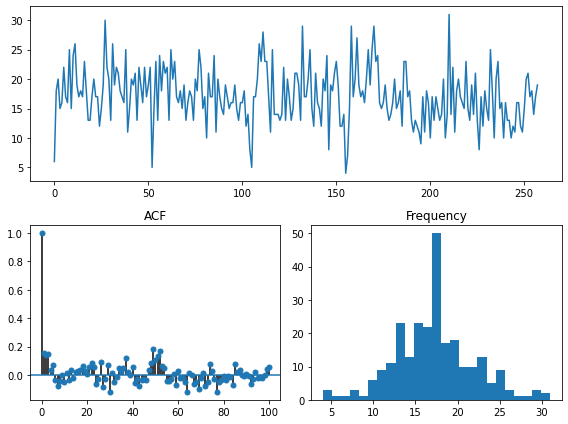

In [194]:
# Examining the data
tsdisplay(shoot_train, lag_max=100)

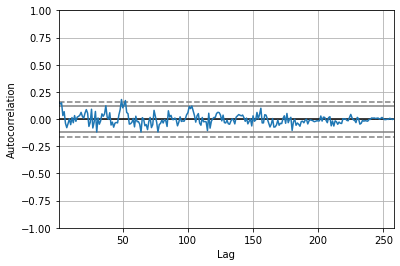

array([ 1.        ,  0.15459486,  0.13806233,  0.14985915,  0.03213631,
        0.0685629 , -0.03824827, -0.07902409, -0.04090407,  0.00249561,
       -0.05112975,  0.01407551, -0.03357643,  0.03216826, -0.02068413,
        0.01786198,  0.02458945,  0.03486903,  0.06181654,  0.02461467,
        0.00787729,  0.05501616,  0.08720373,  0.05488412, -0.06744784,
       -0.03129985,  0.09045623, -0.0819137 , -0.02904586,  0.07016035,
       -0.11929814,  0.01022037, -0.04704175, -0.01699145,  0.04831623,
        0.0257939 ,  0.04755871,  0.12228811,  0.01929533, -0.00260699,
        0.05842069])

In [195]:
# Auto correlation plot
pm.utils.autocorr_plot(shoot_train)
pm.utils.acf(shoot_train)

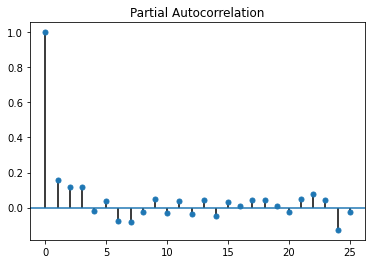

array([ 1.        ,  0.15519639,  0.11789462,  0.11874794, -0.01956537,
        0.0382716 , -0.07551677, -0.08438339, -0.02482301,  0.04687875,
       -0.03320268,  0.04015531, -0.03359686,  0.04541808, -0.04944319,
        0.03225553,  0.01141341,  0.04223117,  0.04140822,  0.00931187,
       -0.02647724,  0.04893249,  0.07524995,  0.04360112, -0.12713107,
       -0.027112  ,  0.11764904, -0.09768148, -0.01762874,  0.13106725,
       -0.14692802, -0.00198798, -0.03879358,  0.04639963,  0.02952165,
        0.04796154,  0.04982277,  0.10962693, -0.07261322, -0.05984401,
        0.04319296])

In [196]:
pm.utils.plot_pacf(shoot_train)
pm.utils.pacf(shoot_train)

### Comments
 - slide downward trend detected
 - ACF and PACF not trailing off quickly
 - No seasonality
 - Data seems normally distributed

In [197]:
# estimate the differencing term 
pm.arima.ndiffs(shoot_train)

1

In [198]:
# estimate the seasonality
pm.arima.nsdiffs(shoot_train,m=12)

0

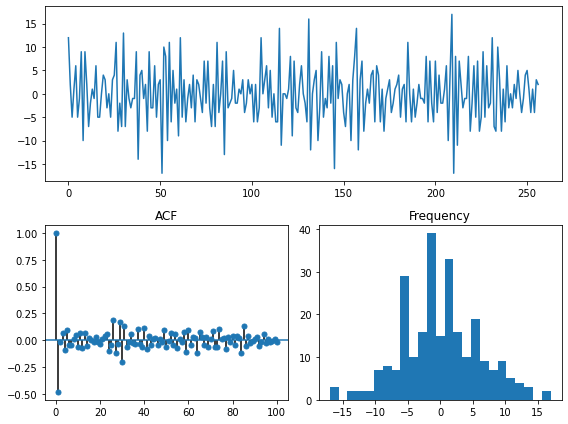

In [199]:
# detrend data and plot
shoot_train_d = pm.utils.diff(shoot_train)
tsdisplay(shoot_train_d, lag_max=100)

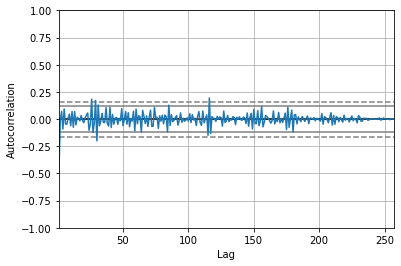

array([ 1.        , -0.48233912, -0.0140153 ,  0.07095651, -0.09104665,
        0.09220598, -0.04532653, -0.04752335,  0.00831061,  0.0461674 ,
       -0.06132234,  0.07007327, -0.07526408,  0.0685674 , -0.05319106,
        0.01733819,  0.00501301, -0.01646987,  0.03370238, -0.01343428,
       -0.03336909,  0.01096227,  0.03567593,  0.05590157, -0.10248519,
       -0.0491712 ,  0.18337285, -0.12233507, -0.03779641,  0.17187068,
       -0.20048695,  0.12914945, -0.0615502 , -0.01911991,  0.05283576,
       -0.03106564, -0.03177851,  0.10497676, -0.03949963, -0.06477397,
        0.10897864])

In [200]:
# acf of detrend data
pm.utils.autocorr_plot(shoot_train_d)
pm.utils.acf(shoot_train_d)

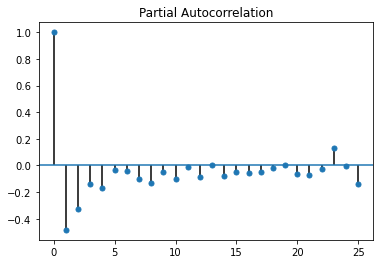

array([ 1.        , -0.48422326, -0.32473984, -0.13801567, -0.17250695,
       -0.03682811, -0.03944897, -0.10110613, -0.1344333 , -0.0467526 ,
       -0.1021539 , -0.01050341, -0.08579233,  0.00216807, -0.07763908,
       -0.04731712, -0.05701524, -0.04912407, -0.01825004,  0.00173714,
       -0.06611451, -0.07466547, -0.02789758,  0.13114738, -0.00257983,
       -0.14295962,  0.09100549,  0.02520118, -0.11635082,  0.16124769,
       -0.03007014,  0.02136887, -0.06075165, -0.02812043, -0.04004662,
       -0.02093607, -0.08449613,  0.08856313,  0.07606793, -0.0556227 ,
        0.05808757])

In [201]:
# PACF of detrend data
pm.utils.plot_pacf(shoot_train_d)
pm.utils.pacf(shoot_train_d)

### Comments
- No trend detected
- ACF and PACF looks good as trail off to zero at early lags
- We can suggest an ARMA(3,0,2)

In [202]:
# Fitting a baseline model
fit1 = pm.auto_arima(shoot_train_d, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1660.239, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1593.221, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1658.257, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1565.012, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1561.593, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1555.500, Time=0.18 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1556.845, Time=0.22 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1553.518, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1559.610, Time=0.03 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1554.863, Time=0

In [203]:
# Examining the summary
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  257
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -757.626
Date:                Thu, 28 Jan 2021   AIC                           1525.253
Time:                        19:58:29   BIC                           1542.998
Sample:                             0   HQIC                          1532.389
                                - 257                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1161      0.071      1.642      0.101      -0.023       0.255
ar.L2          0.0943      0.071      1.323      0.186      -0.045       0.234
ar.L3          0.1107      0.057      1.927      0.054      -0.002       0.223
ma.L1         -0.9862      0.019    -53.049      0.000      -1.023      -0.950
sigma2        21.0446      1.796     11.719      0.000      17.525      24.564
===================================================================================
Ljung-Box (Q):                       32.70   Jarque-Bera (JB):                 5.65
Prob(Q):                              0.79   Prob(JB):                         0.06
Heteroskedasticity (H):               0.85   Skew:                             0.29
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [205]:
# Fitting a model using pipeline
pipe = pipeline.Pipeline([
    ('model',pm.ARIMA(order=(3, 1, 1)))
                         ])
pipe.fit(shoot_train)
print(pipe)

Pipeline(steps=[('model', ARIMA(order=(3, 1, 1)))])


In [213]:
model = pm.ARIMA(order=(3, 1, 1))

In [214]:
model.fit(shoot_train)

ARIMA(order=(3, 1, 1))

In [215]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  258
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -756.153
Date:                Thu, 28 Jan 2021   AIC                           1524.307
Time:                        20:00:06   BIC                           1545.601
Sample:                             0   HQIC                          1532.870
                                - 258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0077      0.005     -1.660      0.097      -0.017       0.001
ar.L1          0.1080      0.071      1.526      0.127      -0.031       0.247
ar.L2          0.0863      0.069      1.243      0.214      -0.050       0.222
ar.L3          0.1030      0.059      1.757      0.079      -0.012       0.218
ma.L1         -0.9998      1.345     -0.743      0.457      -3.637       1.637
sigma2        20.6569     27.670      0.747      0.455     -33.576      74.890
===================================================================================
Ljung-Box (Q):                       33.36   Jarque-Bera (JB):                 5.63
Prob(Q):                              0.76   Prob(JB):                         0.06
Heteroskedasticity (H):               0.81   Skew:                             0.29
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

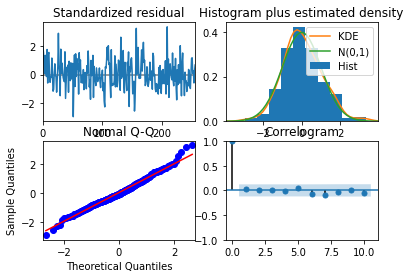

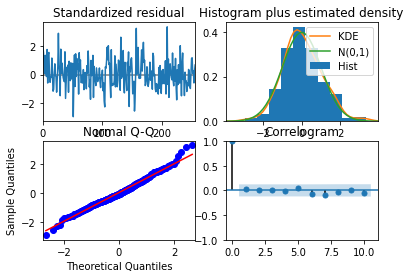

In [226]:
model.plot_diagnostics()

In [235]:
# Computing the mean square error 
shoot_pred,conf_int = model.predict(n_periods = 6, return_conf_int=True)
mse(shoot_test[23:],shoot_pred)

61.52010279263917

(0.0, 287.0)

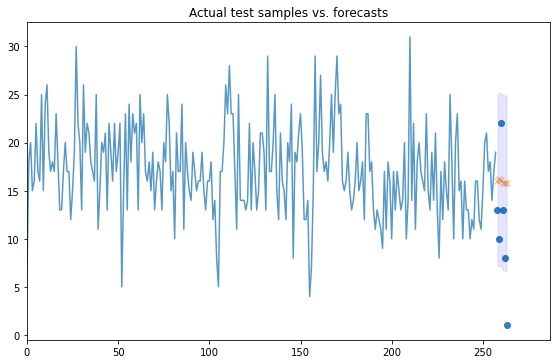

In [263]:
# Let's take a look at the actual vs. the predicted values:
fig, axes = plt.subplots(figsize=(8, 5))
fig.tight_layout()

n_train = shoot_train.shape[0] 

# Visualize actual + predicted
x1 = np.arange(n_train + shoot_pred.shape[0])
axes.plot(x1[:n_train], shoot_train, alpha=0.75)
axes.scatter(x1[n_train:], shoot_test[23:], alpha=0.9, marker='o')
axes.scatter(x1[n_train:], shoot_pred, alpha=0.4, marker='x')
axes.fill_between(x1[n_train:], conf_int[:, 0], conf_int[:, 1],
                     alpha=0.1, color='b')
axes.set_title('Actual test samples vs. forecasts')
axes.set_xlim((0, shoot_ts.shape[0]))
